In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm_notebook
np.set_printoptions(suppress=True)
from sklearn import preprocessing
from tqdm import tqdm
import decimal
from random import shuffle
from time import sleep
tqdm.pandas()
from sklearn.preprocessing import LabelEncoder
import gc
import datetime
import os
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
import random

In [2]:
#Always seed the randomness of this universe
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [3]:
seed_everything(seed=51)

In [4]:
cols_to_remove = ['id_15','id_16']

In [5]:
def less_category(x):
    if x in temp:
        return x
    else:
        return 999999

In [6]:
def less_category_str(x):
    if x in temp:
        return x
    else:
        return '999999'

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)

In [8]:
%%time
train = pd.read_csv('../input/train2.csv')
print("train finished")

<string>:2: DtypeWarning: Columns (408,412) have mixed types. Specify dtype option on import or set low_memory=False.


train finished
CPU times: user 38 s, sys: 3.51 s, total: 41.5 s
Wall time: 42.2 s


In [9]:
%%time
test = pd.read_csv('../input/test2.csv')
print("test finished")

<string>:2: DtypeWarning: Columns (407,411) have mixed types. Specify dtype option on import or set low_memory=False.


test finished
CPU times: user 32.4 s, sys: 1.94 s, total: 34.4 s
Wall time: 35 s


In [10]:
#sample_submission
sample_submission = pd.read_csv('../input/sample_submission.csv')
print(train.shape,test.shape,sample_submission.shape)

(590540, 729) (506691, 728) (506691, 2)


# id_20

In [11]:
column_name = 'id_20'

In [12]:
train[column_name].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    144.0
Name: id_20, dtype: float64

In [13]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(451279, 371058)

In [14]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7641802418125783, 0.7323161453430197)

In [15]:
train[column_name].nunique(),test[column_name].nunique()

(394, 436)

In [16]:
train[column_name].unique()[:5]

array([ nan, 144., 500., 142., 507.])

In [17]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

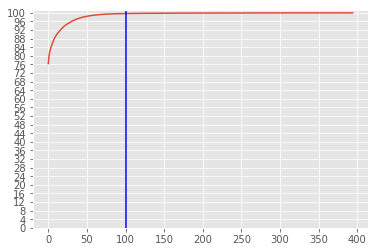

In [18]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(100,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [19]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

100
100


In [20]:
train[column_name] = train[column_name].apply(less_category)
test[column_name] = test[column_name].apply(less_category)

In [21]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [22]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(1843, 2120)

In [23]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [24]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [25]:
temp.head()

,isFraud,id_20,fraud_count
556.0,0.569444,72,41.0
340.0,0.505376,372,188.0
139.0,0.436275,408,178.0
565.0,0.264957,468,124.0
610.0,0.225092,271,61.0


In [26]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 400)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [27]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove(888888)
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove(999999)
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card


In [28]:
print(fraudulent_card)

[139.0, 565.0, 561.0, 417.0, 638.0, 612.0, 325.0, 595.0, 566.0, 507.0, 563.0, 333.0, 122.0, 315.0, 401.0, 127.0, 549.0, 597.0, 305.0, 177.0, 225.0, 107.0, 368.0, 391.0, 278.0, 611.0, 178.0, 216.0]


In [29]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [30]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

# id_21

In [31]:
column_name = 'id_21'

In [32]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_21, dtype: float64

In [33]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585381, 501632)

In [34]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.9912639279303688, 0.990015611092362)

In [35]:
train[column_name].nunique(),test[column_name].nunique()

(490, 443)

In [36]:
train[column_name].unique()[:5]

array([ nan, 252., 657., 724., 228.])

In [37]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

In [38]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

100
83


In [39]:
train[column_name] = train[column_name].apply(less_category)
test[column_name] = test[column_name].apply(less_category)

In [40]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == 999999 else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == 999999 else 0)

In [41]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(825, 2610)

In [42]:
fraudulent_card = [252.0]

In [43]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [44]:
cols_to_remove.append(column_name)

# id_22

In [45]:
column_name = 'id_22'

In [46]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_22, dtype: float64

In [47]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585371, 501629)

In [48]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.9912469942764249, 0.9900096903240831)

In [49]:
train[column_name].nunique(),test[column_name].nunique()

(25, 26)

In [50]:
train[column_name].unique()[:5]

array([nan, 14., 41., 21., 33.])

In [51]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

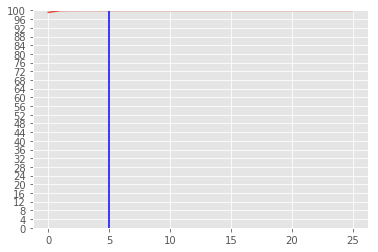

In [52]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(5,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [53]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

36
17


In [54]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [55]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [56]:
temp.head()

,isFraud,id_22,fraud_count
42.0,1.000000,3,3.0
33.0,0.421053,38,16.0
20.0,0.250000,4,1.0
41.0,0.186916,321,60.0
14.0,0.073057,4736,346.0


In [57]:
fraudulent_card = [14,41]

In [58]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [59]:
cols_to_remove.append(column_name)

# id_23

In [60]:
column_name = 'id_23'

In [61]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: id_23, dtype: object

In [62]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585371, 501629)

In [63]:
train[column_name].nunique(),test[column_name].nunique()

(3, 3)

In [64]:
train[column_name].unique()[:5]

array([nan, 'IP_PROXY:TRANSPARENT', 'IP_PROXY:ANONYMOUS',
       'IP_PROXY:HIDDEN'], dtype=object)

In [65]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

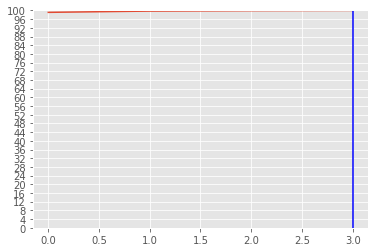

In [66]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(3,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [67]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

4
4


In [68]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [69]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [70]:
temp.head()

,isFraud,id_23,fraud_count
IP_PROXY:ANONYMOUS,0.137255,1071,147.0
IP_PROXY:TRANSPARENT,0.070221,3489,245.0
IP_PROXY:HIDDEN,0.055829,609,34.0
888888,0.034571,585371,20237.0


In [71]:
train[column_name + '_' + 'IP'] = train[column_name].apply(lambda x: 1 if 'IP' in x else 0)
test[column_name + '_' + 'IP'] = test[column_name].apply(lambda x: 1 if 'IP' in x else 0)

In [72]:
cols_to_remove.append(column_name)

# id_24

In [73]:
column_name = 'id_24'

In [74]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_24, dtype: float64

In [75]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585793, 501951)

In [76]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.9919615944728554, 0.9906451861193508)

In [77]:
train[column_name].nunique(),test[column_name].nunique()

(12, 15)

In [78]:
train[column_name].unique()[:5]

array([nan, 11., 15., 16., 12.])

In [79]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

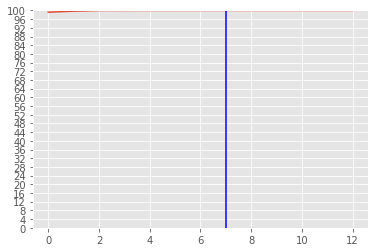

In [80]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(7,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [81]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

18
11


In [82]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [83]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [84]:
temp

,isFraud,id_24,fraud_count
17.0,1.000000,9,9.0
24.0,0.500000,12,6.0
26.0,0.500000,8,4.0
19.0,0.400000,5,2.0
25.0,0.285714,7,2.0
11.0,0.094072,2817,265.0
16.0,0.063636,220,14.0
15.0,0.061481,1594,98.0
21.0,0.060606,33,2.0
888888.0,0.034587,585793,20261.0


In [85]:
fraudulent_card = [11,15]

In [86]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [87]:
cols_to_remove.append(column_name)

# id_25

In [88]:
column_name = 'id_25'

In [89]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_25, dtype: float64

In [90]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585408, 501652)

In [91]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.9913096487960172, 0.990055082880888)

In [92]:
train[column_name].nunique(),test[column_name].nunique()

(341, 309)

In [93]:
train[column_name].unique()[:5]

array([ nan, 321., 161., 460., 426.])

In [94]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

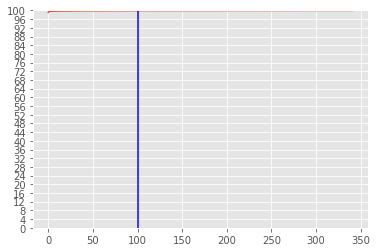

In [95]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(100,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [96]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [97]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [98]:
temp.head()

,isFraud,id_25,fraud_count
409.0,1.0,4,4.0
461.0,1.0,3,3.0
539.0,1.0,1,1.0
161.0,1.0,14,14.0
403.0,1.0,4,4.0


In [99]:
fraudulent_card = [501,321]

In [100]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [101]:
cols_to_remove.append(column_name)

# id_26

In [102]:
column_name = 'id_26'

In [103]:
train[column_name].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: id_26, dtype: float64

In [104]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585377, 501644)

In [105]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.9912571544687913, 0.9900392941654775)

In [106]:
train[column_name].nunique(),test[column_name].nunique()

(95, 94)

In [107]:
train[column_name].unique()[:5]

array([ nan, 184., 102., 159., 142.])

In [108]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

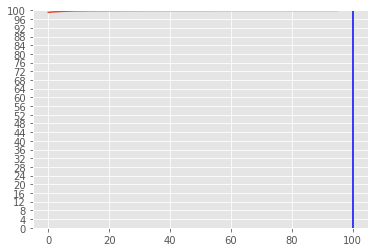

In [109]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(100,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [110]:
cols_to_remove.append(column_name)

# id_27

In [111]:
column_name = 'id_27'

In [112]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: id_27, dtype: object

In [113]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(585371, 501629)

In [114]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.9912469942764249, 0.9900096903240831)

In [115]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [116]:
train[column_name].unique()[:5]

array([nan, 'Found', 'NotFound'], dtype=object)

In [117]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

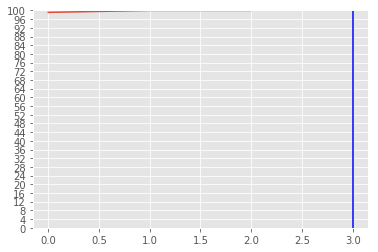

In [118]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(3,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [119]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [120]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [121]:
temp.head()

,isFraud,id_27,fraud_count
Found,0.082638,5155,426.0
888888,0.034571,585371,20237.0
NotFound,0.000000,14,0.0


In [122]:
fraudulent_card = ['Found']

In [123]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [124]:
cols_to_remove.append(column_name)

# id_28

In [125]:
column_name = 'id_28'

In [126]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    New
Name: id_28, dtype: object

In [127]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449562, 369913)

In [128]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7612727334304196, 0.7300563854499094)

In [129]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [130]:
train[column_name].unique()[:5]

array([nan, 'New', 'Found'], dtype=object)

In [131]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

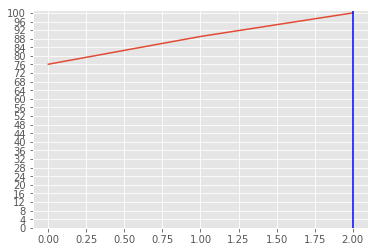

In [132]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(2,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [133]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [134]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [135]:
temp.head()

,isFraud,id_28,fraud_count
Found,0.102752,76232,7833.0
New,0.052281,64746,3385.0
888888,0.021009,449562,9445.0


In [136]:
fraudulent_card = ['Found']

In [137]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [138]:
cols_to_remove.append(column_name)

# id_29

In [139]:
column_name = 'id_29'

In [140]:
train[column_name].head()

0         NaN
1         NaN
2         NaN
3         NaN
4    NotFound
Name: id_29, dtype: object

In [141]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449562, 369913)

In [142]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7612727334304196, 0.7300563854499094)

In [143]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [144]:
train[column_name].unique()[:5]

array([nan, 'NotFound', 'Found'], dtype=object)

In [145]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

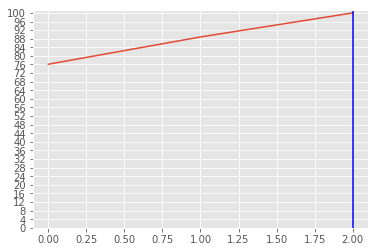

In [146]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(2,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [147]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [148]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [149]:
temp.head()

,isFraud,id_29,fraud_count
Found,0.104463,74926,7827.0
NotFound,0.051338,66052,3391.0
888888,0.021009,449562,9445.0


In [150]:
#dropping id_29 because it is same as id_28

In [151]:
cols_to_remove.append(column_name)

# id_30

In [152]:
column_name = 'id_30'

In [153]:
train[column_name].head()

0            NaN
1            NaN
2            NaN
3            NaN
4    Android 7.0
Name: id_30, dtype: object

In [154]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(512975, 436032)

In [155]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.868654113184543, 0.8605481447272598)

In [156]:
train[column_name].nunique(),test[column_name].nunique()

(75, 86)

In [157]:
train[column_name].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [158]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

In [159]:
train[column_name] = train[column_name].apply(lambda x: str(x).lower())
test[column_name] = test[column_name].apply(lambda x: str(x).lower())

In [160]:
for i in ['android','mac','windows','linux','ios','func','other']:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i in x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i in x else 0)

In [161]:
def is_mobile(x):
    if ('ios' in x) | ('android' in x):
        return 1
    else:
        return 0
def is_desktop(x):
    if ('windows' in x) | ('linux' in x) | ('mac' in x):
        return 1
    else:
        return 0
def is_apple(x):
    if ('ios' in x) | ('mac' in x):
        return 1
    else:
        return 0

In [162]:
#is_mobile
train[column_name + '_' + 'is_mobile'] = train[column_name].apply(lambda x: is_mobile(x))
test[column_name + '_' + 'is_mobile'] = test[column_name].apply(lambda x: is_mobile(x) )
#is_desktop
train[column_name + '_' + 'is_desktop'] = train[column_name].apply(lambda x: is_desktop(x))
test[column_name + '_' + 'is_desktop'] = test[column_name].apply(lambda x: is_desktop(x) )
#is_apple
train[column_name + '_' + 'is_apple'] = train[column_name].apply(lambda x: is_apple(x))
test[column_name + '_' + 'is_apple'] = test[column_name].apply(lambda x: is_apple(x) )

In [163]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,DT,month,weekofyear,dayofyear,hour,dayofweek,day,card1_999999,card1_fraudulent,card2_999999,card2_fraudulent,card3_999999,card3_185.0,card4_discover,card5_nan,card5_999999,card5_137.0,card5_118.0,card5_100.0,card5_150.0,card5_229.0,card5_117.0,card5_166.0,card5_126.0,is_debit,ProductCD_C,ProductCD_W,addr1_999999,addr1_nan,addr1_888888.0,addr1_191.0,addr1_184.0,addr1_436.0,addr1_143.0,addr1_205.0,addr1_194.0,addr1_494.0,addr1_444.0,addr2_999999,addr2_nan,addr2_96.0,addr2_999999.0,TransactionAmt_decimal,TransactionAmt_check,dist1_999999,dist1_nan,dist1_91.0,dist1_130.0,dist1_116.0,dist1_108.0,dist1_86.0,dist1_95.0,dist1_114.0,dist1_33.0,dist1_12.0,dist1_27.0,dist1_50.0,dist1_55.0,dist1_54.0,dist1_42.0,dist1_47.0,dist1_35.0,dist1_43.0,dist1_49.0,dist2_999999,dist2_nan,dist2_0.0,dist2_9.0,dist2_1.0,dist2_10.0,dist2_68.0,dist2_999999.0,dist2_7.0,P_emaildomain_prefix,P_emaildomain_suffix,P_emaildomain_lesscategory,P_emaildomain_999999,P_emaildomain_nan,P_emaildomain_mail.com,P_emaildomain_outlook.es,P_emaildomain_aim.com,P_emaildomain_outlook.com,P_emaildomain_roadrunner.com,P_emaildomain_verizon.net,P_emaildomain_att.net,P_emaildomain_sbcglobal.net,P_emaildomain_rocketmail.com,P_emaildomain_windstream.net,P_emaildomain_hotmail.fr,P_emaildomain_protonmail,R_emaildomain_prefix,R_emaildomain_suffix,R_emaildomain_lesscategory,R_emaildomain_999999,R_emaildomain_nan,R_emaildomain_protonmail,R_emaildomain_outlook.com,R_emaildomain_outlook.es,R_emaildomain_icloud.com,R_emaildomain_gmail.com,R_emaildomain_bellsouth.net,R_emaildomain_sbcglobal.net,R_emaildomain_msn.com,R_emaildomain_verizon.net,R_emaildomain_hotmail.fr,R_emaildomain_att.net,group_1_mean,group_1_median,group_1_min,group_1_max,group_1_sum,group_1_std,group_1_kurtosis,group_2_mean,group_2_median,group_2_min,group_2_max,group_2_sum,group_2_std,group_2_kurtosis,group_3_mean,group_3_median,group_3_min,group_3_max,group_3_sum,group_3_std,gr

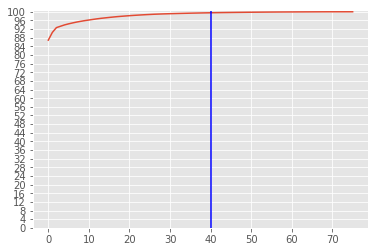

In [164]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(40,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [165]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(40).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

40
33


In [166]:
train[column_name] = train[column_name].apply(less_category_str)
test[column_name] = test[column_name].apply(less_category_str)

In [167]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == '999999' else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == '999999' else 0)

In [168]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(5370, 19561)

In [169]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [170]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [171]:
temp

,isFraud,id_30,fraud_count
android 5.1.1,0.288571,350,101.0
ios 11.4.0,0.200000,5,1.0
ios 11.2.5,0.121667,1200,146.0
ios 11.2.2,0.117517,902,106.0
android 7.1.1,0.106349,630,67.0
android,0.105653,1079,114.0
android 6.0.1,0.084806,566,48.0
ios 11.2.0,0.084507,852,72.0
linux,0.074824,1136,85.0
ios 11.1.1,0.070000,700,49.0


In [172]:
mask1 = ((temp['isFraud'] > 0.1060) & (temp[column_name] > 349)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [173]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove('888888')
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove('999999')
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card
999999.0 not in fraudulent_card


In [174]:
print(fraudulent_card)

['android 5.1.1', 'ios 11.2.5', 'ios 11.2.2', 'android 7.1.1', 'mac os x 10_13_1', 'mac os x 10_13_2', 'mac os x 10_12_6', 'mac os x 10_11_6']


In [175]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [176]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

# id_31

In [177]:
column_name = 'id_31'

In [178]:
train[column_name].head()

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4    samsung browser 6.2
Name: id_31, dtype: object

In [179]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(450258, 370066)

In [180]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7624513157449114, 0.7303583446321328)

In [181]:
train[column_name].nunique(),test[column_name].nunique()

(130, 135)

In [182]:
[x for x in test[column_name].unique() if x not in train[column_name].unique()][:5]

[nan,
 'firefox 61.0',
 'samsung browser 7.2',
 'chrome 67.0 for ios',
 'google search application 52.0']

In [183]:
train[column_name].unique()[:5]

array([nan, 'samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0',
       'chrome 62.0 for android'], dtype=object)

In [184]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

In [185]:
train[column_name] = train[column_name].apply(lambda x: str(x).lower())
test[column_name] = test[column_name].apply(lambda x: str(x).lower())

In [186]:
for i in ['chrome','mobile safari','safari','ie','firefox','edge','for android','for ios','opera','google search','samsung']:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i in x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i in x else 0)

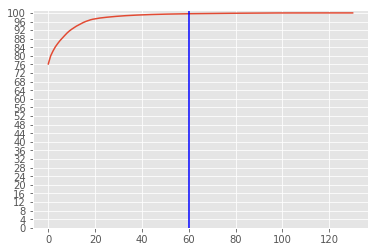

In [187]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(60,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [188]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(80).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

80
53


In [189]:
train[column_name] = train[column_name].apply(less_category_str)
test[column_name] = test[column_name].apply(less_category_str)

In [190]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == '999999' else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == '999999' else 0)

In [191]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(29105, 84249)

In [192]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [193]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [194]:
temp.head()

,isFraud,id_31,fraud_count
chrome 67.0,0.272727,33,9.0
chrome 58.0,0.271277,188,51.0
chrome 50.0 for android,0.262069,145,38.0
android webview 4.0,0.242105,285,69.0
firefox,0.218425,673,147.0


In [195]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 400)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [196]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove('888888')
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove('999999')
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card


In [197]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

# id_32

In [198]:
column_name = 'id_32'

In [199]:
train[column_name].head()

0     NaN
1     NaN
2     NaN
3     NaN
4    32.0
Name: id_32, dtype: float64

In [200]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(512954, 436020)

In [201]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.8686185525112609, 0.8605244616541442)

In [202]:
train[column_name].nunique(),test[column_name].nunique()

(4, 5)

In [203]:
train[column_name].unique()[:5]

array([nan, 32., 24., 16.,  0.])

In [204]:
train[column_name].fillna(888888,inplace=True)
test[column_name].fillna(888888,inplace=True)

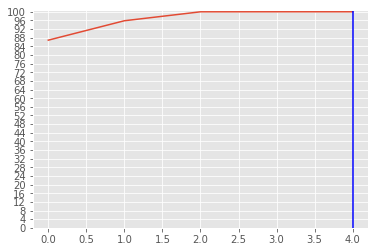

In [205]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(4,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [206]:
train[column_name].value_counts(normalize=True)

888888.0    0.868619
24.0        0.089869
32.0        0.041366
16.0        0.000137
0.0         0.000010
Name: id_32, dtype: float64

In [207]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

7
4


In [208]:
temp

[888888.0, 24.0, 32.0, 16.0]

In [209]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

In [210]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [211]:
temp

,isFraud,id_32,fraud_count
0.0,0.500000,6,3.0
16.0,0.222222,81,18.0
32.0,0.066727,24428,1630.0
24.0,0.033917,53071,1800.0
888888.0,0.033555,512954,17212.0


In [212]:
fraudulent_card = [32]

In [213]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [214]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

# id_33

In [215]:
column_name = 'id_33'

In [216]:
train[column_name].head()

0          NaN
1          NaN
2          NaN
3          NaN
4    2220x1080
Name: id_33, dtype: object

In [217]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(517251, 436020)

In [218]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.8758949436109323, 0.8605244616541442)

In [219]:
train[column_name].nunique(),test[column_name].nunique()

(260, 390)

In [220]:
train[column_name].unique()[:10]

array([nan, '2220x1080', '1334x750', '1280x800', '1366x768', '1920x1080',
       '1680x1050', '1136x640', '5120x2880', '2880x1800'], dtype=object)

In [221]:
train[column_name].fillna('888888x888888',inplace=True)
test[column_name].fillna('888888x888888',inplace=True)

In [222]:
train[column_name].head().apply(lambda x: x.split('x'))

0    [888888, 888888]
1    [888888, 888888]
2    [888888, 888888]
3    [888888, 888888]
4        [2220, 1080]
Name: id_33, dtype: object

In [223]:
train[column_name + '_firstframe'] = train[column_name].apply(lambda x: int(x.split('x')[0]) )
train[column_name + '_secondframe'] = train[column_name].apply(lambda x: int(x.split('x')[1]) )

test[column_name + '_firstframe'] = test[column_name].apply(lambda x: int(x.split('x')[0]) )
test[column_name + '_secondframe'] = test[column_name].apply(lambda x: int(x.split('x')[1]) )

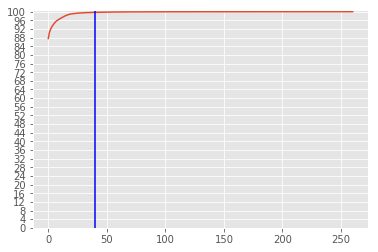

In [224]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(40,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [225]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(40).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

40
39


In [226]:
train[column_name] = train[column_name].apply(less_category_str)
test[column_name] = test[column_name].apply(less_category_str)

In [227]:
train[column_name + '_999999'] = train[column_name].apply(lambda x: 1 if x == '999999' else 0)
test[column_name + '_999999'] = test[column_name].apply(lambda x: 1 if x == '999999' else 0)

In [228]:
train[column_name + '_999999'].sum(),test[column_name + '_999999'].sum()

(2087, 4265)

In [229]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [230]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [231]:
temp.head()

,isFraud,id_33,fraud_count
1024x600,0.647727,88,57.0
855x480,0.380000,250,95.0
1280x720,0.137329,1318,181.0
2436x1125,0.113208,1484,168.0
2208x1242,0.098367,4900,482.0


In [232]:
mask1 = ((temp['isFraud'] > 0.07) & (temp[column_name] > 400)) | ((temp['isFraud'] < 0.0175) & (temp[column_name] > 450))

In [233]:
fraudulent_card = [x for x in list(temp[mask1].index)]
try:
    fraudulent_card.remove('888888')
except:
    print("{} not in fraudulent_card".format(888888.0))
try:
    fraudulent_card.remove('999999')
except:
    print("{} not in fraudulent_card".format(999999.0))   

888888.0 not in fraudulent_card
999999.0 not in fraudulent_card


In [234]:
print(fraudulent_card)

['1280x720', '2436x1125', '2208x1242', '2880x1800', '1680x1050', '2560x1440']


In [235]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [236]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

# id_34

In [237]:
column_name = 'id_34'

In [238]:
train[column_name].head()

0               NaN
1               NaN
2               NaN
3               NaN
4    match_status:2
Name: id_34, dtype: object

In [239]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(512735, 434516)

In [240]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.8682477054898906, 0.8575561831569931)

In [241]:
train[column_name].nunique(),test[column_name].nunique()

(4, 2)

In [242]:
train[column_name].unique()[:5]

array([nan, 'match_status:2', 'match_status:1', 'match_status:0',
       'match_status:-1'], dtype=object)

In [243]:
train[column_name].fillna('888888',inplace=True)
test[column_name].fillna('888888',inplace=True)

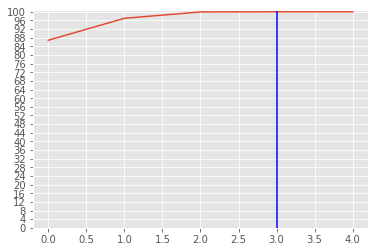

In [244]:
pd.Series(train[column_name].value_counts(normalize=True,dropna=False)*100).cumsum().reset_index(drop=True).plot(kind='line')
plt.axvline(3,color='blue')
plt.yticks(range(0,101,4))
plt.show()

In [245]:
temp = list(pd.concat([train[column_name],test[column_name]],axis= 0).value_counts().head(100).index)
print(len(temp))
temp = [x for x in temp if x in train[column_name].unique()]
temp = [x for x in temp if x in test[column_name].unique()]
print(len(temp))

5
3


In [246]:
temp = pd.concat([train.groupby(column_name)['isFraud'].mean().sort_values(ascending=False),train[column_name].value_counts()],axis=1)
temp = temp.sort_values(by = 'isFraud',ascending= False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [247]:
temp['fraud_count'] = temp['isFraud'] * temp[column_name]

In [248]:
temp

,isFraud,id_34,fraud_count
match_status:1,0.063651,17376,1106.0
match_status:0,0.050602,415,21.0
match_status:2,0.039293,60011,2358.0
888888,0.033503,512735,17178.0
match_status:-1,0.000000,3,0.0


In [249]:
fraudulent_card = ['match_status:1']

In [250]:
for i in fraudulent_card:
    train[column_name + '_' + str(i)] = train[column_name].apply(lambda x: 1 if i == x else 0)
    test[column_name + '_' + str(i)] = test[column_name].apply(lambda x: 1 if i == x else 0)

In [251]:
le = LabelEncoder()
le.fit(list(train[column_name]) + list(test[column_name]))
train[column_name] = le.transform(train[column_name])
test[column_name] = le.transform(test[column_name])

In [252]:
cols_to_remove.append(column_name)

# id_35

In [253]:
column_name = 'id_35'

In [254]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4      T
Name: id_35, dtype: object

In [255]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449555, 369714)

In [256]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7612608798726589, 0.7296636411540761)

In [257]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [258]:
train[column_name].unique()[:5]

array([nan, 'T', 'F'], dtype=object)

In [259]:
train[column_name] = train[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)
test[column_name] = test[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)

In [260]:
train[column_name].value_counts(normalize=True,dropna=False)

NaN     0.761261
 1.0    0.131768
 0.0    0.106972
Name: id_35, dtype: float64

In [261]:
test[column_name].value_counts(normalize=True,dropna=False)

NaN     0.729664
 1.0    0.141408
 0.0    0.128929
Name: id_35, dtype: float64

In [262]:
train.groupby(column_name)['isFraud'].mean()

id_35
0.0    0.122604
1.0    0.044683
Name: isFraud, dtype: float64

# id_36

In [263]:
column_name = 'id_36'

In [264]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4      F
Name: id_36, dtype: object

In [265]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449555, 369714)

In [266]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7612608798726589, 0.7296636411540761)

In [267]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [268]:
train[column_name].unique()[:5]

array([nan, 'F', 'T'], dtype=object)

In [269]:
train[column_name] = train[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)
test[column_name] = test[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)

# id_37

In [270]:
column_name = 'id_37'

In [271]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4      T
Name: id_37, dtype: object

In [272]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449555, 369714)

In [273]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7612608798726589, 0.7296636411540761)

In [274]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [275]:
train[column_name].unique()[:5]

array([nan, 'T', 'F'], dtype=object)

In [276]:
train[column_name] = train[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)
test[column_name] = test[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)

In [277]:
train.groupby(column_name)['isFraud'].mean()

id_37
0.0    0.066158
1.0    0.083312
Name: isFraud, dtype: float64

# id_38

In [278]:
column_name = 'id_38'

In [279]:
train[column_name].head()

0    NaN
1    NaN
2    NaN
3    NaN
4      T
Name: id_38, dtype: object

In [280]:
train[column_name].isnull().sum(),test[column_name].isnull().sum()

(449555, 369714)

In [281]:
train[column_name].isnull().sum()/len(train),test[column_name].isnull().sum()/len(test)

(0.7612608798726589, 0.7296636411540761)

In [282]:
train[column_name].nunique(),test[column_name].nunique()

(2, 2)

In [283]:
train[column_name].unique()[:5]

array([nan, 'T', 'F'], dtype=object)

In [284]:
train[column_name] = train[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)
test[column_name] = test[column_name].apply(lambda x: 1 if x=='T' else 0 if x =='F' else x)

In [285]:
train.groupby(column_name)['isFraud'].mean()

id_38
0.0    0.097792
1.0    0.059541
Name: isFraud, dtype: float64

In [286]:
print(train.shape,test.shape)

(590540, 811) (506691, 810)


In [287]:
train.drop(cols_to_remove,axis=1,inplace=True)
test.drop(cols_to_remove,axis=1,inplace=True)
print(train.shape,test.shape)

(590540, 799) (506691, 798)


In [288]:
train.to_csv('../input/train3.csv',index=False)
test.to_csv('../input/test3.csv',index=False)